In [29]:
from sklearn import svm

classifier = svm.SVC()

In [30]:
import numpy as np
import pandas as pd

In [3]:
data_train = pd.read_csv("./train.csv")
data_train

,filename,dispersion_entropy,RDE,kelas
0,FNSZ325.mat,2.177414,0.004687,FNSZ
1,FNSZ443.mat,2.173413,0.005799,FNSZ
2,FNSZ457.mat,2.128589,0.014401,FNSZ
3,GNSZ018.mat,0.778805,0.549478,GNSZ
4,FNSZ331.mat,1.926150,0.065480,FNSZ
...,...,...,...,...
861,FNSZ300.mat,2.151531,0.008903,FNSZ
862,GNSZ029.mat,2.060288,0.019217,GNSZ
863,GNSZ001.mat,1.545435,0.161897,GNSZ
864,FNSZ328.mat,2.140018,0.013467,FNSZ


In [4]:
data_test = pd.read_csv('./test.csv')
data_test

,filename,dispersion_entropy,RDE,kelas
0,MYSZ003.mat,0.079170,0.784690,MYSZ
1,FNSZ641.mat,1.386467,0.183812,FNSZ
2,FNSZ899.mat,1.617569,0.122826,FNSZ
3,FNSZ655.mat,2.030250,0.031383,FNSZ
4,GNSZ232.mat,1.392251,0.189670,GNSZ
...,...,...,...,...
680,GNSZ203.mat,1.474234,0.157782,GNSZ
681,GNSZ217.mat,1.356132,0.219959,GNSZ
682,FNSZ880.mat,1.862965,0.059810,FNSZ
683,FNSZ658.mat,1.302725,0.218821,FNSZ


In [5]:
data_test['kelas'].value_counts()

FNSZ    410
GNSZ    138
CPSZ     98
ABSZ     14
TNSZ      9
TCSZ      9
SPSZ      5
MYSZ      2
Name: kelas, dtype: int64

In [11]:
data_test=data_test[data_test.kelas != "ABSZ"]
data_test=data_test[data_test.kelas != "TCSZ"]
data_test=data_test[data_test.kelas != "TNSZ"]
data_test=data_test[data_test.kelas != "SPSZ"]
data_test=data_test[data_test.kelas != "MYSZ"]

for a in range(250):
    if(data_test['kelas'].iloc[a] == "FNSZ"):
        data_test = data_test.drop(data_test.iloc[a].name)


data_test['kelas'].value_counts()

FNSZ    261
GNSZ    138
CPSZ     98
Name: kelas, dtype: int64

In [6]:
data_train['kelas'].value_counts()

FNSZ    521
GNSZ    172
CPSZ    132
ABSZ     14
TCSZ     11
TNSZ      9
SPSZ      5
MYSZ      2
Name: kelas, dtype: int64

In [12]:
data_train=data_train[data_train.kelas != "ABSZ"]
data_train=data_train[data_train.kelas != "TCSZ"]
data_train=data_train[data_train.kelas != "TNSZ"]
data_train=data_train[data_train.kelas != "SPSZ"]
data_train=data_train[data_train.kelas != "MYSZ"]
data_train['kelas'].value_counts()

for a in range(310):
    if(data_train['kelas'].iloc[a] == "FNSZ"):
        data_train = data_train.drop(data_train.iloc[a].name)


data_train['kelas'].value_counts()

FNSZ    332
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [17]:
for a in range(130,200):
    if(data_train['kelas'].iloc[a] == "FNSZ"):
        data_train = data_train.drop(data_train.iloc[a].name)


data_train['kelas'].value_counts()

FNSZ    228
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [18]:
data_train = data_train.drop(columns=["filename"])
data_train

,dispersion_entropy,RDE,kelas
3,0.778805,0.549478,GNSZ
6,1.395718,0.213245,GNSZ
7,1.487364,0.158293,GNSZ
11,1.985896,0.037056,FNSZ
12,2.080581,0.017452,CPSZ
...,...,...,...
861,2.151531,0.008903,FNSZ
862,2.060288,0.019217,GNSZ
863,1.545435,0.161897,GNSZ
864,2.140018,0.013467,FNSZ


In [19]:
classes_train = np.array(data_train['kelas'])
data_train = data_train.drop(columns=["kelas"])

In [20]:
data_train

,dispersion_entropy,RDE
3,0.778805,0.549478
6,1.395718,0.213245
7,1.487364,0.158293
11,1.985896,0.037056
12,2.080581,0.017452
...,...,...
861,2.151531,0.008903
862,2.060288,0.019217
863,1.545435,0.161897
864,2.140018,0.013467


In [21]:
classifier.fit(data_train,classes_train)

SVC()

In [22]:
data_test = data_test.drop(columns=["filename"])
classes_test = np.array(data_test['kelas'])
data_test = data_test.drop(columns=["kelas"])

In [23]:
prediksi = classifier.predict(data_test)

In [24]:
data_train.iloc[[3]]

,dispersion_entropy,RDE
11,1.985896,0.037056


In [25]:
classifier.predict(data_train.iloc[[3]])

array(['FNSZ'], dtype=object)

In [26]:
classes_train[3]

'FNSZ'

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes_test,prediksi)
print("Akurasi: ",str(acc))

Akurasi:  0.5251509054325956


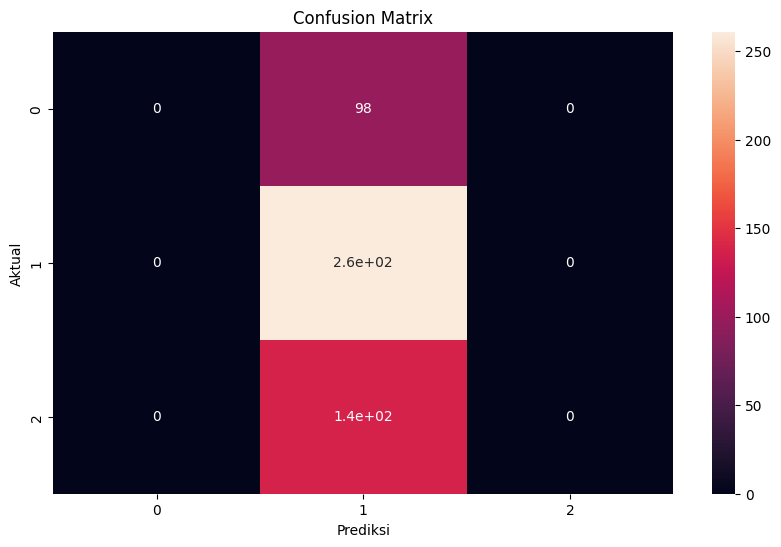

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(classes_test, prediksi)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()